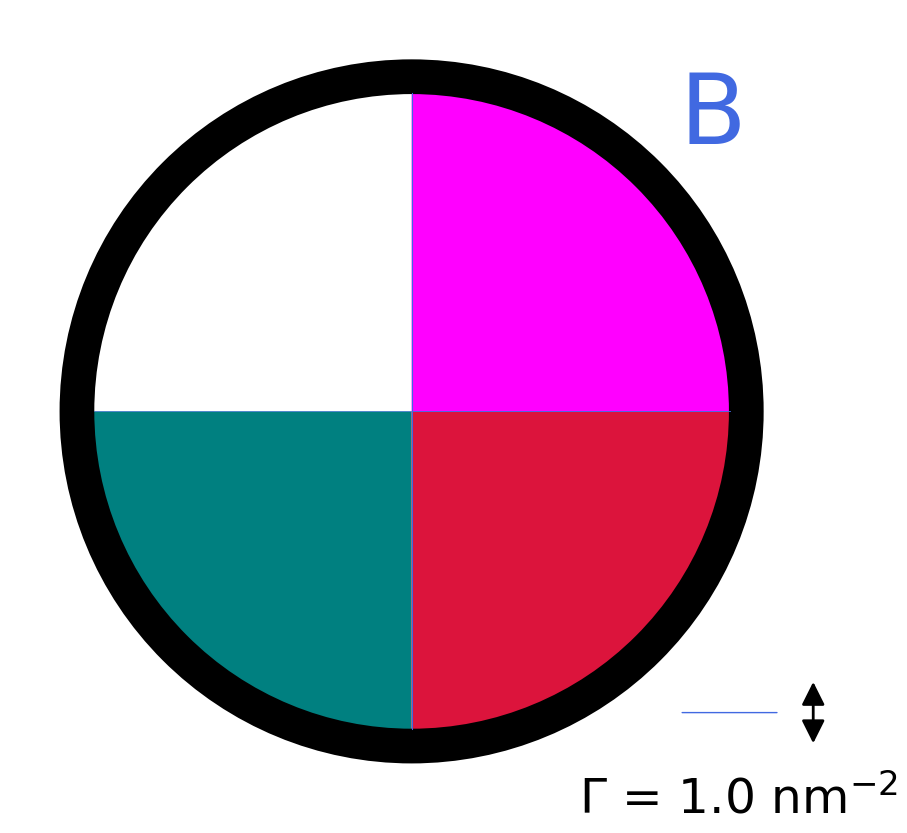

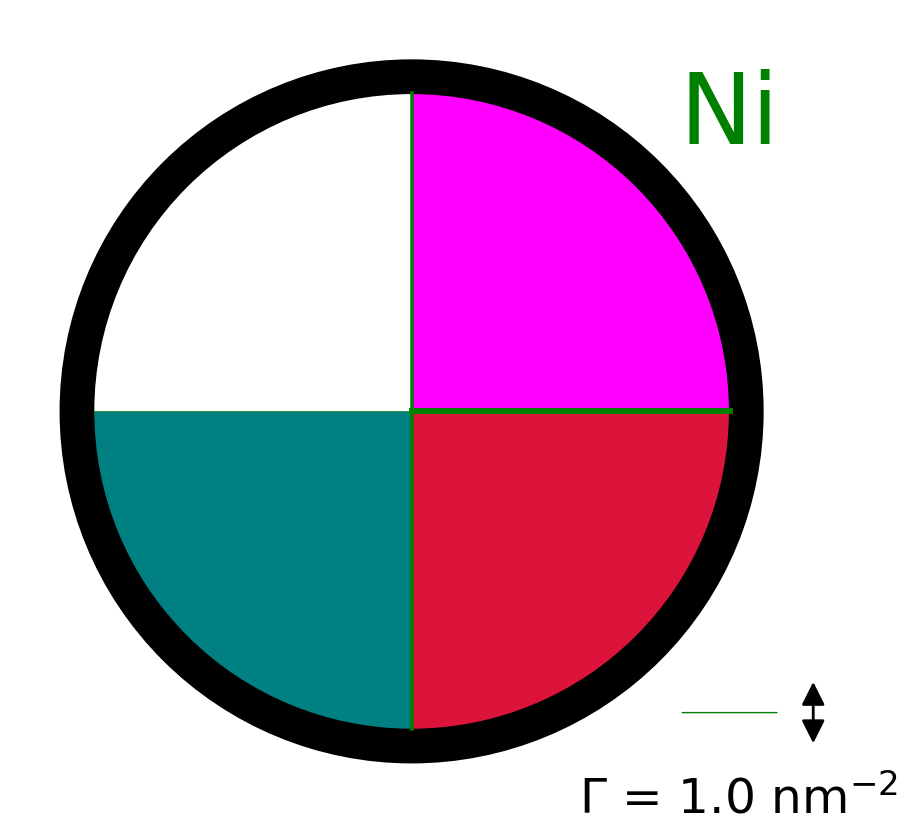

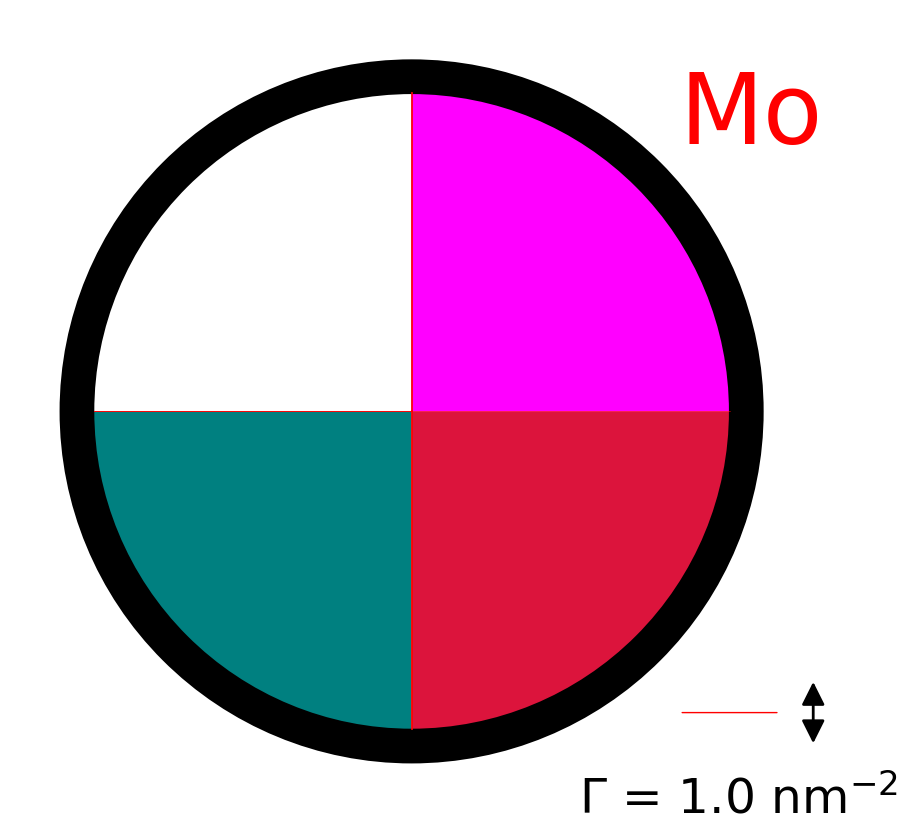

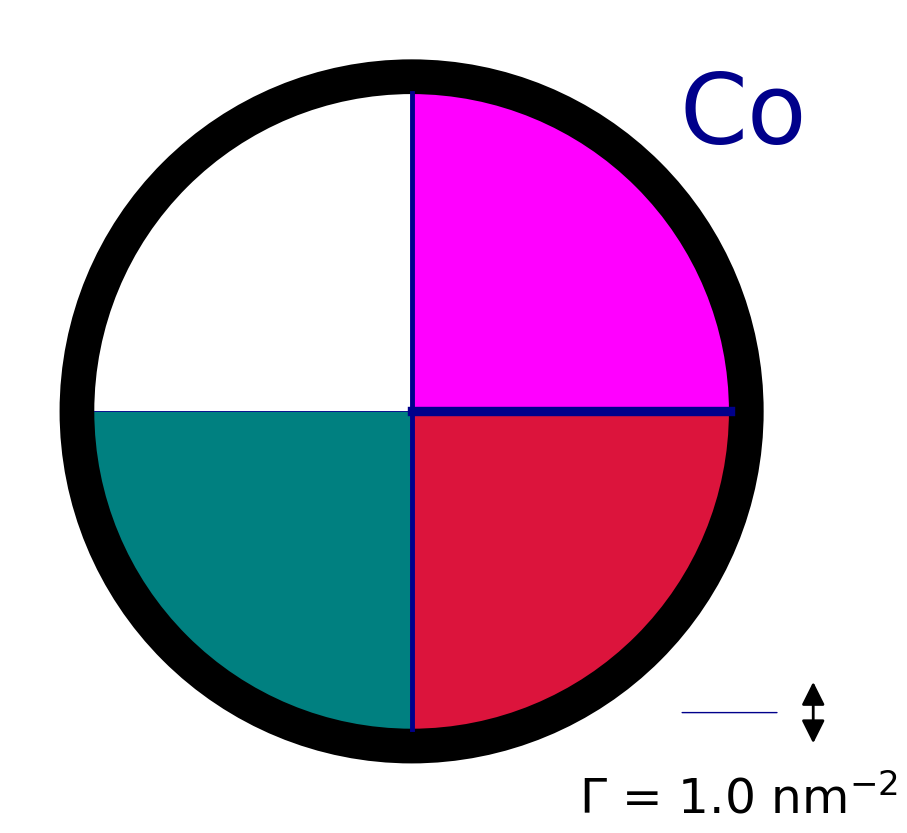

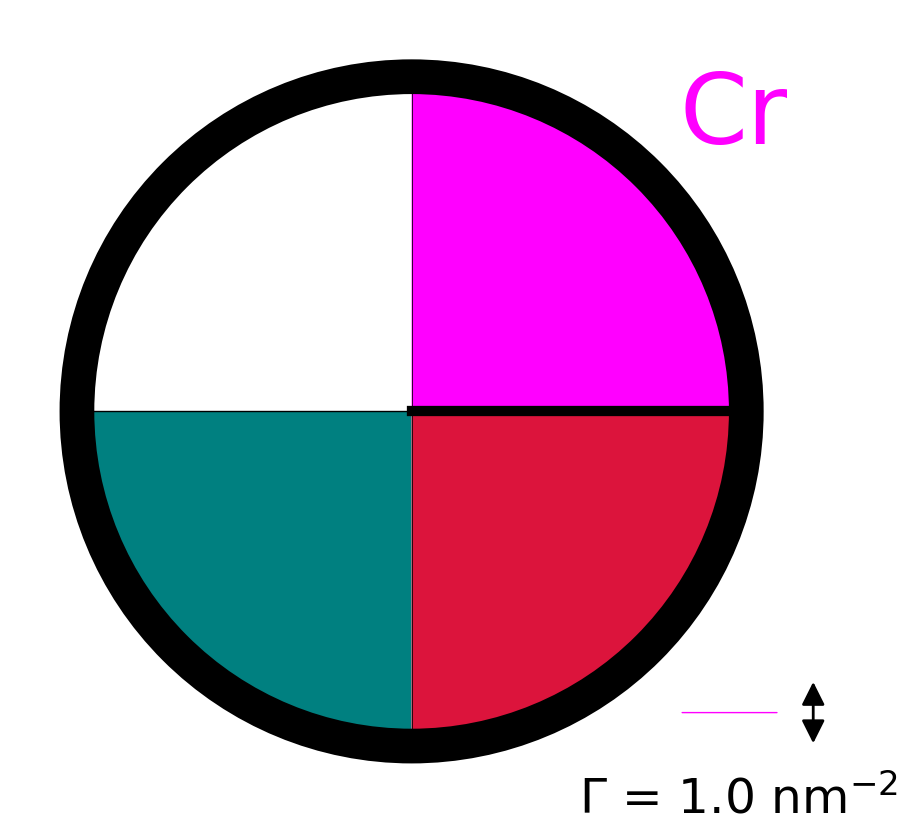

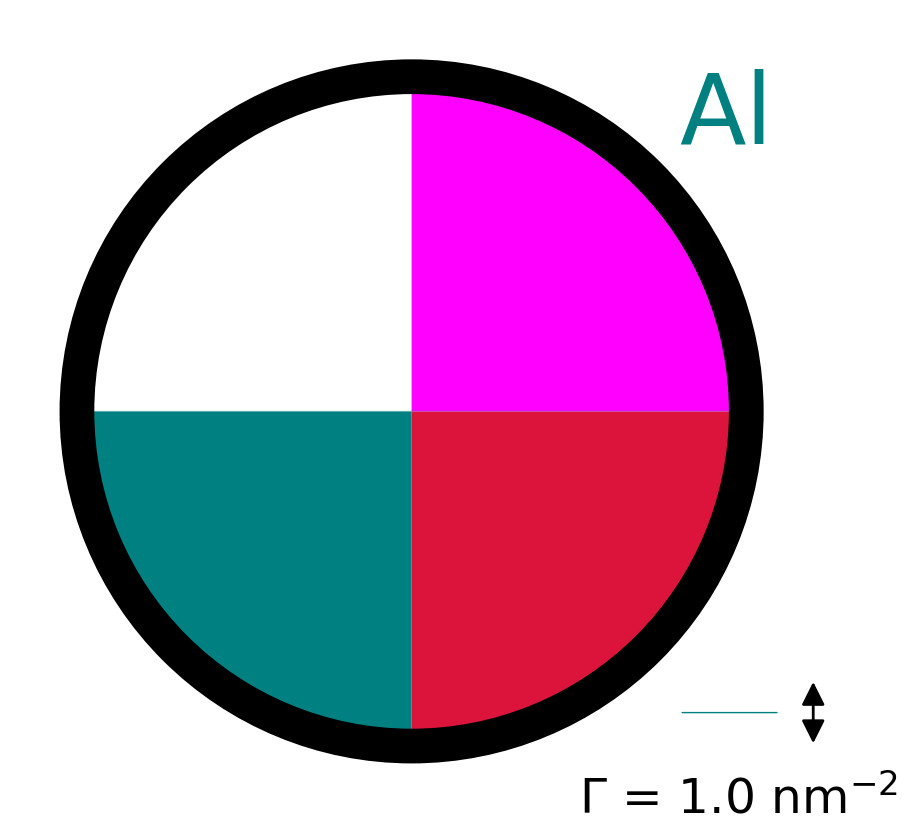

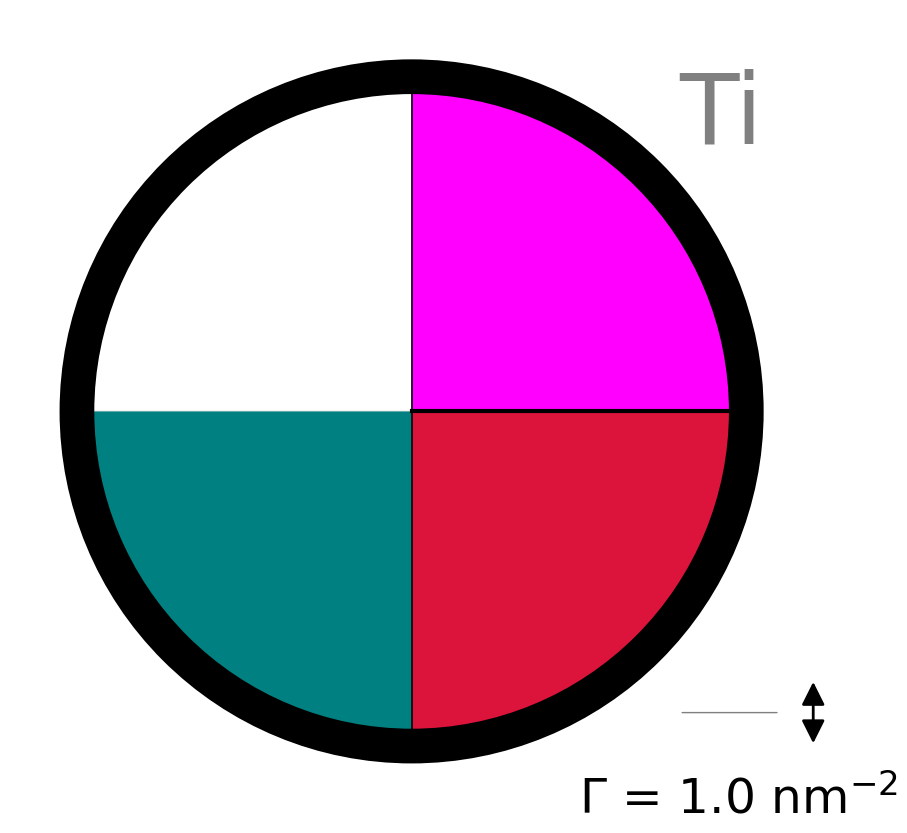

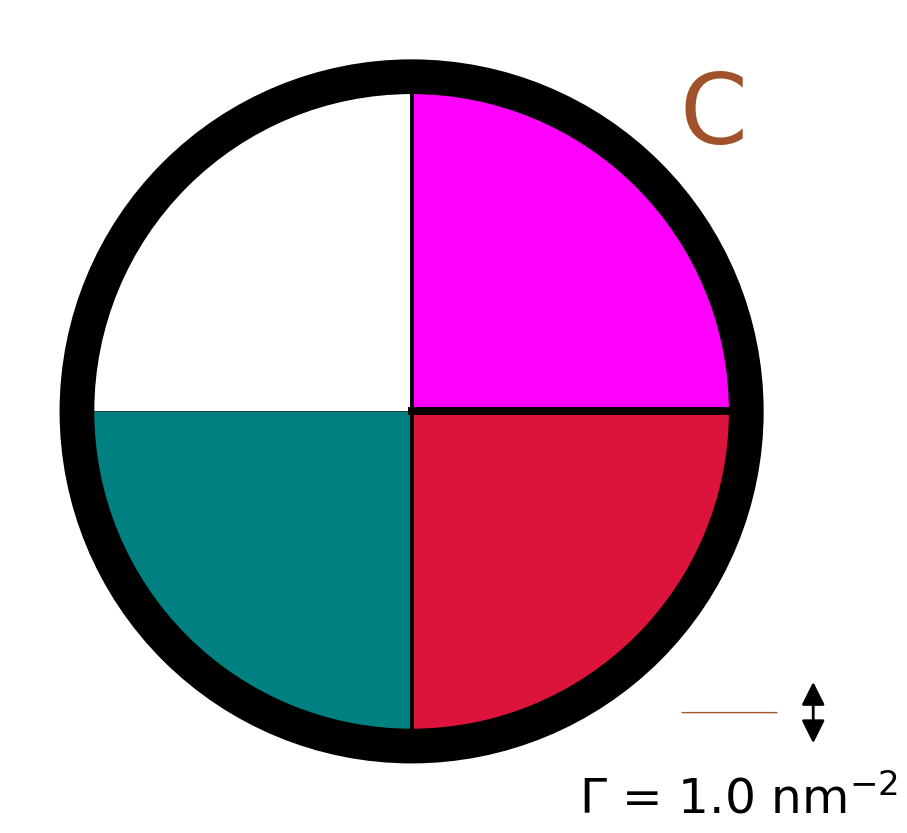

In [39]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 4 10:16:23 2022
@author: felixtheska
"""


import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot
import glob

# Importing data and defining phases and boundaries
IFE = glob.glob('../test/R41*')
Interfaces=["CarbidesMatrix","M23C6M6C","CarbidesMatrix","GPMatrix"]
Phases=["Matrix", "GP", "M6C", "M23C6"]
PhaseColors=['white', 'teal', 'crimson', 'magenta']
ElementList=["B", "C", "Al", "Ti", "Cr", "Co", "Ni", "Mo"]
ElementColors=['royalblue', 'sienna', 'teal', 'grey', 'magenta', 'darkblue', 'green', 'red']
ScaleFactor=1

# Setting up plot aestetics
plt.rc('font', size=35)
plt.rc('axes', linewidth=0)
plt.rc('xtick.major', width=3)
plt.rc('ytick.major', width=3)
plt.rc('ytick.minor', width=3)
LineWidth = 25
Format = ".svg"


def Read_in(File_Name):
    Data = pd.read_csv(File_Name,header=0)
    Element = Data['Element'].str.replace(' cumulative ', '',regex=True).str.replace('(', '',regex=False).str.replace(')','',regex=False).str.replace('cts','',regex=True)
    Excess = Data['Interfacial Excess (nm-2)']
    return Element, Excess
    
def Plot_legend(ElementColors, Label):
    ax.annotate('',(0.8,-0.9),(1.1,-0.9),arrowprops=dict(arrowstyle='-',lw=ScaleFactor,color=ElementColors))
    ax.annotate('Γ = 1.0 $\mathregular{nm^{-2}}$',(0.5,-1.2))
    ax.annotate('',(1.2,-1),(1.2,-0.8),arrowprops=dict(arrowstyle='<|-|>',lw=2,facecolor='black'))
    ax.annotate(Label,(0,0),(0.8,0.8),fontsize=70,color=ElementColors)

def Plot_phases(Phases):
    theta1 = 90
    for etr, column in enumerate(Phases):
        theta2 = theta1 + 360/len(Phases)
        PhaseWedge=plt.patches.Wedge((0,0),1,theta1,theta2,fc=PhaseColors[etr])
        ax.add_artist(PhaseWedge)
        theta1 = theta2

def Plot_excess(Excess,ElementColors):
    theta1 = 90
    for etr, column in enumerate(Phases):
        theta2 = theta1 + 360/len(Phases)
        if Excess[etr] <= 0:
            ExcessColor = 'black'
        elif Excess[etr] >= 0:
            ExcessColor = ElementColors
        plt.pyplot.plot([0,0.95*np.cos(theta1 * np.pi/180)],[0,0.95*np.sin(theta1 * np.pi/180)],color=ExcessColor,linewidth=Excess[etr]*ScaleFactor)
        theta1 = theta2
    
def Summarize(Interfaces, IFE):
    Element, Excess = Read_in(IFE[0])
    List = pd.DataFrame({'Element':Element})
    for etr, column in enumerate(Interfaces):
        for itr, column in enumerate(IFE):
            if Interfaces[etr]==IFE[itr].removeprefix('../test/R41B-IFE-'):
                Element, Excess = Read_in(IFE[itr])
                Entry = pd.DataFrame({IFE[itr].removeprefix('../test/R41B-IFE-'):Excess})
                List = pd.concat([List, Entry],axis=1)      
    return List





# Generating interface plots 
List = Summarize(Interfaces, IFE)
for itr, row in List.iterrows():
    fig = plt.pyplot.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1, aspect='equal')
    Color = ElementColors[ElementList.index(List.loc[itr].values[0])]
    Plot_phases(Phases)
    Plot_excess(List.loc[itr].values[1:5],Color)   
    Plot_legend(Color,List.loc[itr].values[0])
    Edge = plt.patches.Circle((0,0),1,fill=False,linewidth=LineWidth)
    ax.add_patch(Edge)
    
    # Remaining plot aestetics and figure export
    plt.pyplot.xlim([-1.2,1.2])
    plt.pyplot.ylim([-1.2,1.2])
    plt.pyplot.xticks([])
    plt.pyplot.yticks([])
    plt.pyplot.tight_layout()
    plt.pyplot.savefig('export/interface_plot_' + List.loc[itr].values[0] + Format)

 
    

